In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.formula.api import ols
df = pd.read_csv('APMM8-dataset01.csv')
df

,X,y
0,109.934283,193377.544182
1,97.234714,151281.282901
2,112.953771,204142.988530
3,130.460597,272324.184575
4,95.316933,145372.478403
...,...,...
995,94.377994,142523.432754
996,135.953731,295740.616508
997,112.816857,203646.528638
998,88.576420,125538.189326


In [5]:
X = df.iloc[:, 0].values.reshape(-1, 1)  # First column as X
y = df.iloc[:, 1].values  # Second column as y

# Step 3: Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Get coefficients
weight = model.coef_[0]
print(weight)

3248.9495315287904


In [5]:
X = df.iloc[:, 0].values.reshape(-1, 1)  # First column as X
y = df.iloc[:, 1].values  # Second column as y

# Step 3: Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Get coefficients
weight = model.coef_[0]
print(weight)

3248.9495315287904


In [7]:
X = df.iloc[:, 0].values.reshape(-1, 1)  # First column as X
y = df.iloc[:, 1].values  # Second column as y

# Step 3: Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Get coefficients
weight = model.coef_[0]
print(weight)
intercept = model.intercept_
y_pred = model.predict(X)
residuals = y - y_pred

3248.9495315287904


In [8]:
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat:.3f}")

Durbin-Watson statistic: 2.040


In [9]:
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat:.3f}")

Durbin-Watson statistic: 2.040


COMPREHENSIVE REGRESSION ANALYSIS

ANALYZING DATASET 1: APMM8-dataset01.csv
Dataset shape: (1000, 2)
Columns: ['X', 'y']

--- REGRESSION RESULTS ---
Weight (coefficient for X): 3248.950
Intercept: -158774.754
R-squared: 0.981
Durbin-Watson statistic: 2.040


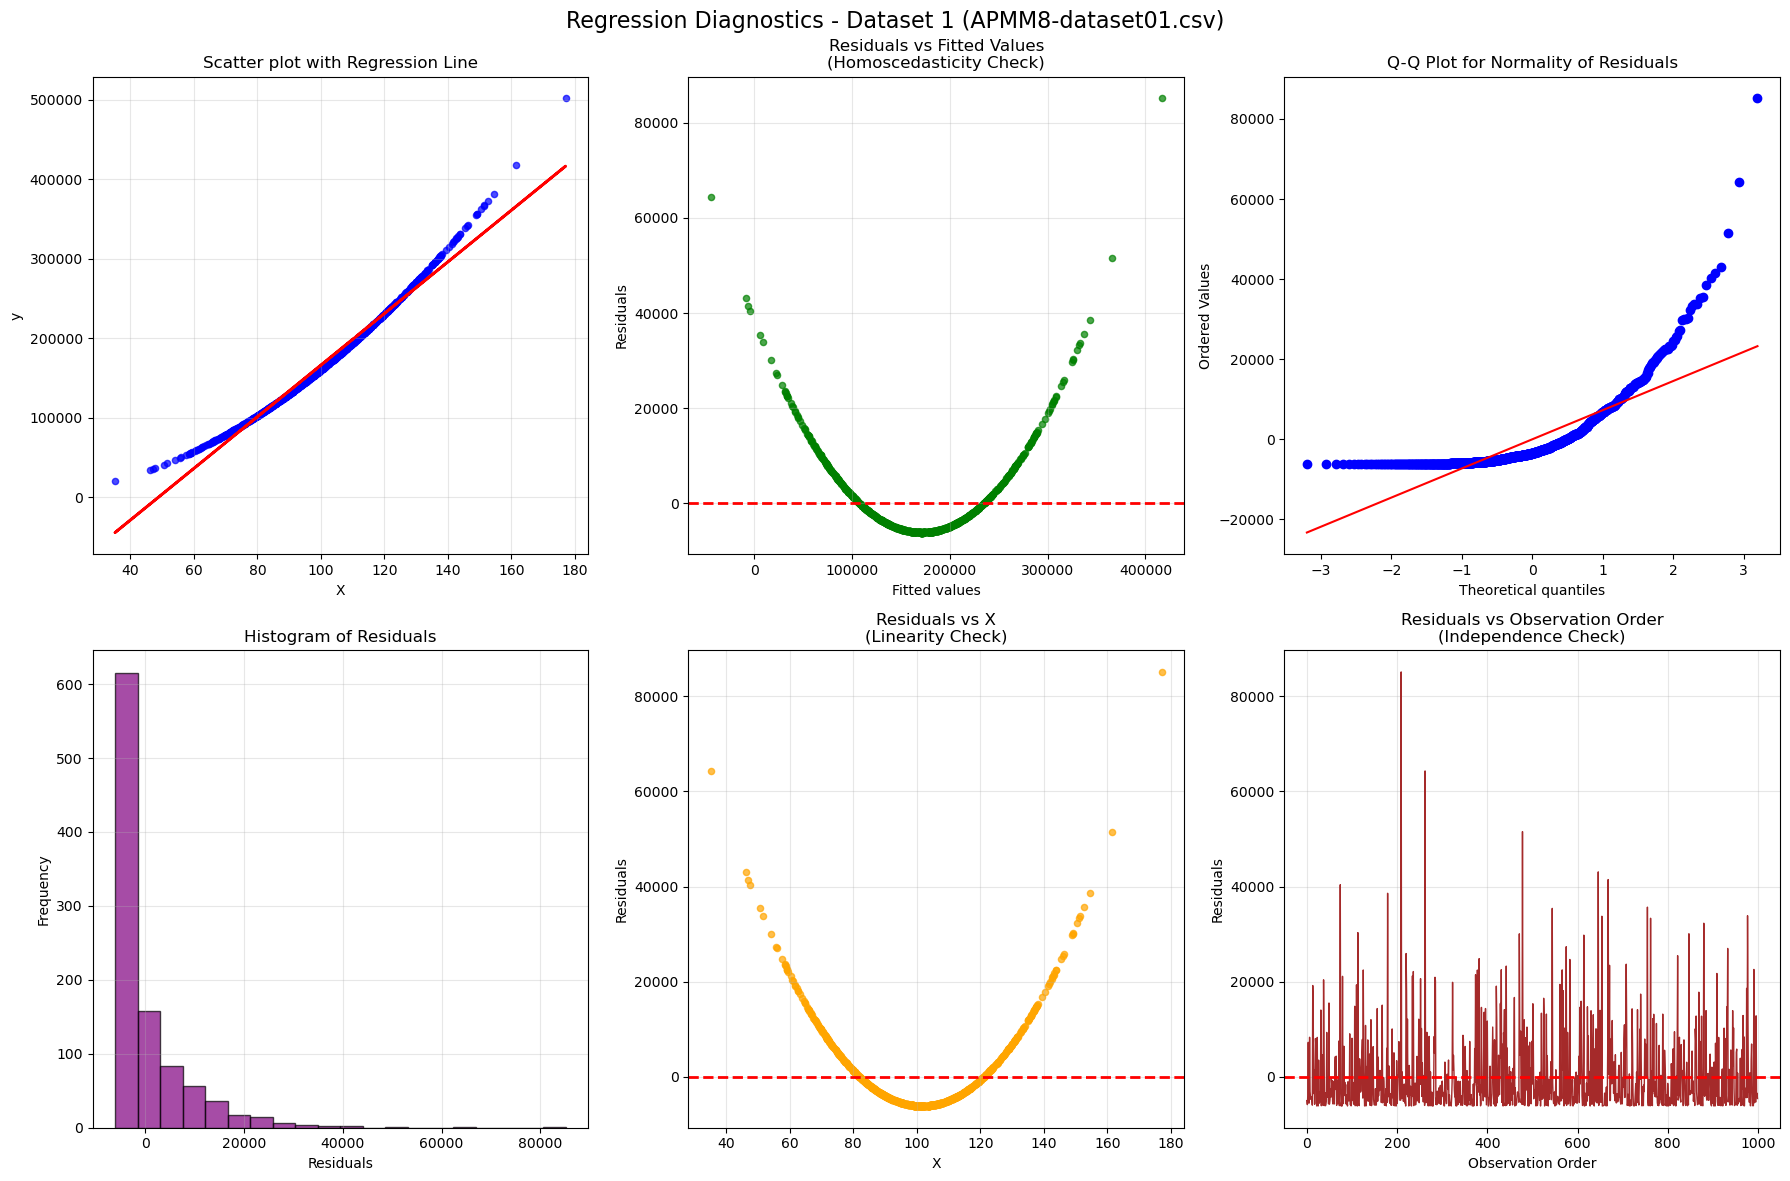


--- ASSUMPTIONS CHECKING ---
Correlation coefficient: 0.991
Durbin-Watson statistic: 2.040
Independence assumption satisfied: Yes
Variance ratio across groups: 1.414
Homoscedasticity: Yes
Shapiro-Wilk test p-value: 0.0000
Normality of residuals: No

ANALYZING DATASET 2: APMM8-dataset02.csv
Dataset shape: (1000, 2)
Columns: ['X', 'y']

--- REGRESSION RESULTS ---
Weight (coefficient for X): 24.996
Intercept: 20.555
R-squared: 1.000
Durbin-Watson statistic: 2.029


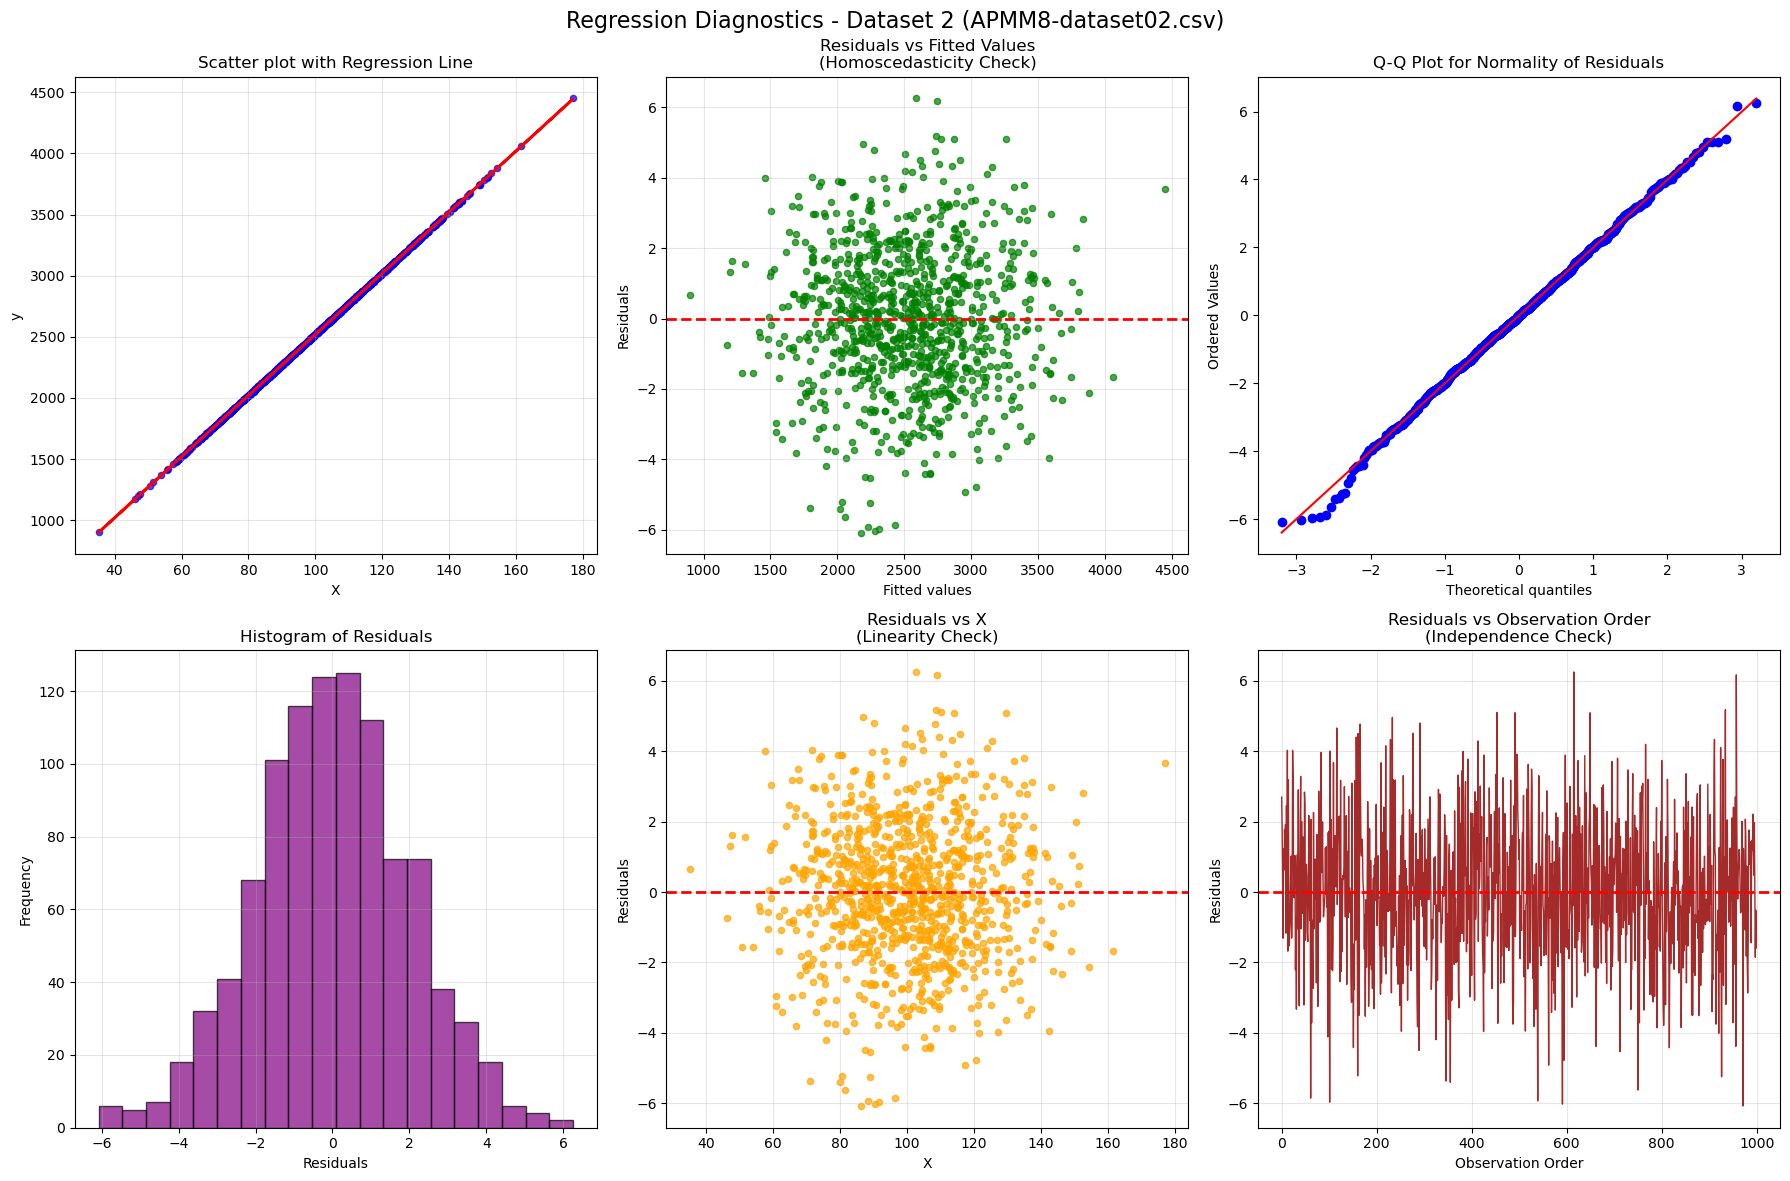


--- ASSUMPTIONS CHECKING ---
Correlation coefficient: 1.000
Durbin-Watson statistic: 2.029
Independence assumption satisfied: Yes
Variance ratio across groups: 1.107
Homoscedasticity: Yes
Shapiro-Wilk test p-value: 0.6383
Normality of residuals: Yes

FINAL ANSWERS FOR ALL QUESTIONS

--- DATASET 01 ANSWERS ---
Q1. Weight for X: 3248.950
Q2. Linearity assumption satisfied: Yes
Q3. Durbin-Watson statistic: 2.040
Q4. Independence assumption satisfied: Yes
Q5. Homoscedasticity: Yes
Q6. Normality of residuals: No

--- DATASET 02 ANSWERS ---
Q7. Weight for X: 24.996
Q8. Intercept: 20.555
Q9. Linearity assumption satisfied: Yes
Q10. Durbin-Watson statistic: 2.029
Q11. Independence assumption satisfied: Yes
Q12. Homoscedasticity: Yes
Q13. Normality of residuals: Yes

DETAILED ANALYSIS SUMMARY

Dataset 01 Details:
- Correlation: 0.991
- Durbin-Watson interpretation: No significant autocorrelation (independence OK)

Dataset 02 Details:
- Correlation: 1.000
- Durbin-Watson interpretation: No sign

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

def analyze_dataset(filename, dataset_num):
    print(f"\n{'='*60}")
    print(f"ANALYZING DATASET {dataset_num}: {filename}")
    print(f"{'='*60}")
    
    # Step 1: Load the dataset
    df = pd.read_csv(filename)
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    
    # Step 2: Extract X and y
    X = df.iloc[:, 0].values.reshape(-1, 1)  # First column as X
    y = df.iloc[:, 1].values  # Second column as y
    
    # Step 3: Perform linear regression
    model = LinearRegression()
    model.fit(X, y)
    
    # Get coefficients
    weight = model.coef_[0]
    intercept = model.intercept_
    y_pred = model.predict(X)
    residuals = y - y_pred
    
    print(f"\n--- REGRESSION RESULTS ---")
    print(f"Weight (coefficient for X): {weight:.3f}")
    print(f"Intercept: {intercept:.3f}")
    print(f"R-squared: {model.score(X, y):.3f}")
    
    # Step 4: Calculate Durbin-Watson statistic
    dw_stat = durbin_watson(residuals)
    print(f"Durbin-Watson statistic: {dw_stat:.3f}")
    
    # Step 5: Create diagnostic plots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'Regression Diagnostics - Dataset {dataset_num} ({filename})', fontsize=16)
    
    # Plot 1: Scatter plot with regression line
    axes[0, 0].scatter(X, y, alpha=0.7, color='blue', s=20)
    axes[0, 0].plot(X, y_pred, color='red', linewidth=2)
    axes[0, 0].set_xlabel('X')
    axes[0, 0].set_ylabel('y')
    axes[0, 0].set_title('Scatter plot with Regression Line')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Plot 2: Residuals vs Fitted values
    axes[0, 1].scatter(y_pred, residuals, alpha=0.7, color='green', s=20)
    axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[0, 1].set_xlabel('Fitted values')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].set_title('Residuals vs Fitted Values\n(Homoscedasticity Check)')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot 3: Q-Q plot for normality
    stats.probplot(residuals, dist="norm", plot=axes[0, 2])
    axes[0, 2].set_title('Q-Q Plot for Normality of Residuals')
    
    # Plot 4: Histogram of residuals
    axes[1, 0].hist(residuals, bins=20, alpha=0.7, color='purple', edgecolor='black')
    axes[1, 0].set_xlabel('Residuals')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Histogram of Residuals')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Plot 5: Residuals vs X
    axes[1, 1].scatter(X, residuals, alpha=0.7, color='orange', s=20)
    axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[1, 1].set_xlabel('X')
    axes[1, 1].set_ylabel('Residuals')
    axes[1, 1].set_title('Residuals vs X\n(Linearity Check)')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Plot 6: Residuals over time/order (for independence check)
    axes[1, 2].plot(range(len(residuals)), residuals, color='brown', linewidth=1)
    axes[1, 2].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[1, 2].set_xlabel('Observation Order')
    axes[1, 2].set_ylabel('Residuals')
    axes[1, 2].set_title('Residuals vs Observation Order\n(Independence Check)')
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Step 6: Statistical tests and assumptions checking
    print(f"\n--- ASSUMPTIONS CHECKING ---")
    
    # Linearity assumption
    correlation = np.corrcoef(X.flatten(), y)[0, 1]
    print(f"Correlation coefficient: {correlation:.3f}")
    
    # Check linearity visually from residuals vs X plot
    # If pattern is random around zero, linearity assumption holds
    
    # Independence assumption (Durbin-Watson)
    print(f"Durbin-Watson statistic: {dw_stat:.3f}")
    if 1.5 <= dw_stat <= 2.5:
        independence = "Yes"
        independence_bool = True
    else:
        independence = "No"
        independence_bool = False
    print(f"Independence assumption satisfied: {independence}")
    
    # Homoscedasticity (check residuals vs fitted plot)
    # Calculate variance of residuals in different regions
    n_groups = 4
    group_size = len(residuals) // n_groups
    residual_variances = []
    
    for i in range(n_groups):
        start_idx = i * group_size
        end_idx = (i + 1) * group_size if i < n_groups - 1 else len(residuals)
        group_residuals = residuals[start_idx:end_idx]
        residual_variances.append(np.var(group_residuals))
    
    variance_ratio = max(residual_variances) / min(residual_variances) if min(residual_variances) > 0 else float('inf')
    print(f"Variance ratio across groups: {variance_ratio:.3f}")
    
    # If variance ratio is close to 1, homoscedasticity holds
    if 0.5 <= variance_ratio <= 2.0:
        homoscedasticity = "Yes"
        homoscedasticity_bool = True
    else:
        homoscedasticity = "No"
        homoscedasticity_bool = False
    print(f"Homoscedasticity: {homoscedasticity}")
    
    # Normality of residuals
    # Shapiro-Wilk test for normality
    shapiro_stat, shapiro_p = stats.shapiro(residuals)
    print(f"Shapiro-Wilk test p-value: {shapiro_p:.4f}")
    
    if shapiro_p > 0.05:
        normality = "Yes"
        normality_bool = True
    else:
        normality = "No"
        normality_bool = False
    print(f"Normality of residuals: {normality}")
    
    # Store results for final summary
    results = {
        'weight': weight,
        'intercept': intercept,
        'dw_stat': dw_stat,
        'independence': independence_bool,
        'homoscedasticity': homoscedasticity_bool,
        'normality': normality_bool,
        'linearity_correlation': correlation
    }
    
    return results

# Step 7: Analyze both datasets
print("COMPREHENSIVE REGRESSION ANALYSIS")
print("="*50)

# Analyze Dataset 01
results_01 = analyze_dataset('APMM8-dataset01.csv', 1)

# Analyze Dataset 02  
results_02 = analyze_dataset('APMM8-dataset02.csv', 2)

# Step 8: Print final answers for all questions
print(f"\n{'='*60}")
print("FINAL ANSWERS FOR ALL QUESTIONS")
print(f"{'='*60}")

print(f"\n--- DATASET 01 ANSWERS ---")
print(f"Q1. Weight for X: {results_01['weight']:.3f}")
print(f"Q2. Linearity assumption satisfied: {'Yes' if results_01['linearity_correlation'] > 0.7 else 'No'}")
print(f"Q3. Durbin-Watson statistic: {results_01['dw_stat']:.3f}")
print(f"Q4. Independence assumption satisfied: {'Yes' if results_01['independence'] else 'No'}")
print(f"Q5. Homoscedasticity: {'Yes' if results_01['homoscedasticity'] else 'No'}")
print(f"Q6. Normality of residuals: {'Yes' if results_01['normality'] else 'No'}")

print(f"\n--- DATASET 02 ANSWERS ---")
print(f"Q7. Weight for X: {results_02['weight']:.3f}")
print(f"Q8. Intercept: {results_02['intercept']:.3f}")
print(f"Q9. Linearity assumption satisfied: {'Yes' if results_02['linearity_correlation'] > 0.7 else 'No'}")
print(f"Q10. Durbin-Watson statistic: {results_02['dw_stat']:.3f}")
print(f"Q11. Independence assumption satisfied: {'Yes' if results_02['independence'] else 'No'}")
print(f"Q12. Homoscedasticity: {'Yes' if results_02['homoscedasticity'] else 'No'}")
print(f"Q13. Normality of residuals: {'Yes' if results_02['normality'] else 'No'}")

# Step 9: Additional detailed analysis
print(f"\n{'='*60}")
print("DETAILED ANALYSIS SUMMARY")
print(f"{'='*60}")

print(f"\nDataset 01 Details:")
print(f"- Correlation: {results_01['linearity_correlation']:.3f}")
print(f"- Durbin-Watson interpretation: ", end="")
if results_01['dw_stat'] < 1.5:
    print("Positive autocorrelation (violates independence)")
elif results_01['dw_stat'] > 2.5:
    print("Negative autocorrelation (violates independence)")
else:
    print("No significant autocorrelation (independence OK)")

print(f"\nDataset 02 Details:")
print(f"- Correlation: {results_02['linearity_correlation']:.3f}")
print(f"- Durbin-Watson interpretation: ", end="")
if results_02['dw_stat'] < 1.5:
    print("Positive autocorrelation (violates independence)")
elif results_02['dw_stat'] > 2.5:
    print("Negative autocorrelation (violates independence)")
else:
    print("No significant autocorrelation (independence OK)")

In [11]:
df = pd.read_csv('APMM8-dataset04.csv')
df

,X1,X2,y
0,202.483571,43.993554,8239.750970
1,199.308678,39.246337,7017.239968
2,203.238443,30.596304,5250.677873
3,207.615149,23.530632,4156.837827
4,198.829233,36.982233,6490.220271
...,...,...,...
995,198.594499,40.701502,7358.125832
996,208.988433,29.734787,5165.849443
997,203.204214,21.181253,3786.903548
998,197.144105,28.369330,4785.854329
